In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define the FrozenLake environment parameters
size = 5
start_state = (0, 0)
goal_state = (4, 4)
holes = {(1, 0), (1, 3), (3, 1), (4, 2)}
actions = ['up', 'down', 'left', 'right']
action_map = {'up': (-1, 0), 'down': (1, 0), 'left': (0, -1), 'right': (0, 1)}


In [3]:
def step(state, action):
    
    move = action_map[action]
    new_pos = (state[0] + move[0], state[1] + move[1])
    
    # Ensures that the new position is within limited area
    if 0 <= new_pos[0] < size and 0 <= new_pos[1] < size:
        state = new_pos
    
    # Check rewards and termination conditions
    if state in holes:
        return state, -5.0, True  # Falls into a hole
    elif state == goal_state:
        return state, 10.0, True  # Reaches goal
    else:
        return state, -1.0, False  # Normal move

In [4]:
def reset():
    
    return start_state

In [5]:
state = reset()


grid = np.full((size, size), '_', dtype=str)
for hole in holes:
    grid[hole] = 'H'
grid[goal_state] = 'G'
grid[state] = 'A'
print("\n".join(" ".join(row) for row in grid))

A _ _ _ _
H _ _ H _
_ _ _ _ _
_ H _ _ _
_ _ H _ G


In [6]:
q_table = np.zeros((size, size, len(actions)))  # Initialize Q-values to zero


In [7]:
# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration probability
episodes = 10000  # Number of training episodes
epsilon_decay = False  # Enable/Disable epsilon decay

In [8]:
# Track rewards
rewards_per_episode = []

training (later used same in function)

In [9]:
# for episode in range(episodes):
#     state = reset()
#     done = False
#     total_reward = 0

#     while not done:
#         # Choose action using epsilon-greedy policy
#         if np.random.rand() < epsilon:
#             action = np.random.choice(actions)  # Explore
#         else:
#             action = actions[np.argmax(q_table[state[0], state[1]])]  # Exploit
        
#         # Take action and observe new state and reward
#         new_state, reward, done = step(state, action)
#         action_idx = actions.index(action)

#         # Q-learning update rule
#         best_future_q = np.max(q_table[new_state[0], new_state[1]])
#         q_table[state[0], state[1], action_idx] += alpha * (reward + gamma * best_future_q - q_table[state[0], state[1], action_idx])
        
#         state = new_state
#         total_reward += reward
    
#     rewards_per_episode.append(total_reward)

#     # Decay epsilon if enabled
#     if epsilon_decay:
#         epsilon = max(0, epsilon - (0.1 / episodes))

In [10]:
# np.savetxt("q_values.txt", np.max(q_table, axis=2), fmt="%.2f")


In [11]:
# plt.plot(rewards_per_episode)
# plt.xlabel("Episode")
# plt.ylabel("Reward")
# plt.title("Learning Curve")
# plt.show()


For testing this at different hyper parameters we can define training loop as fucntion and return the reward history so that it is easy to compare different learing paths (fast learning, short term, future rewards, etc)

In [12]:
def q_learning(alpha, gamma, epsilon, epsilon_decay, episodes=10000):
    """Runs Q-learning and returns rewards per episode."""
    q_table = np.zeros((size, size, len(actions)))  # Initialize Q-table
    rewards_per_episode = []  # Track rewards

    for episode in range(episodes):
        state = reset()
        done = False
        total_reward = 0

        while not done:
            # Choose action (epsilon-greedy)
            if np.random.rand() < epsilon:
                action = np.random.choice(actions)  # Explore
            else:
                action = actions[np.argmax(q_table[state[0], state[1]])]  # Exploit
            
            # Take action and observe new state/reward
            new_state, reward, done = step(state, action)
            action_idx = actions.index(action)

            # Q-learning update
            best_future_q = np.max(q_table[new_state[0], new_state[1]])
            q_table[state[0], state[1], action_idx] += alpha * (reward + gamma * best_future_q - q_table[state[0], state[1], action_idx])
            
            state = new_state
            total_reward += reward
        
        rewards_per_episode.append(total_reward)

        # Decay epsilon if enabled
        if epsilon_decay:
            epsilon = max(0, epsilon - (0.1 / episodes))
    
    return q_table, rewards_per_episode

In [13]:
# Define hyperparameter sets
experiments = {
    "Baseline (alpha=0.5, gamma=0.9, epsilon=0.1)": (0.5, 0.9, 0.1, False),
    "Epsilon Decay (alpha=0.5, gamma=0.9, epsilon=0.1 -> 0)": (0.5, 0.9, 0.1, True),
    "Fast Learning (alpha=0.9, gamma=0.9, epsilon=0.1)": (0.9, 0.9, 0.1, False),
    "Slow Learning (alpha=0.1, gamma=0.9, epsilon=0.1)": (0.1, 0.9, 0.1, False),
    "High Future Rewards (alpha=0.5, gamma=0.99, epsilon=0.1)": (0.5, 0.99, 0.1, False),
    "Short-Term Focus (alpha=0.5, gamma=0.5, epsilon=0.1)": (0.5, 0.5, 0.1, False),
    "Aggressive Exploration (alpha=0.5, gamma=0.9, epsilon=0.5)": (0.5, 0.9, 0.5, False),
    "Greedy Approach (alpha=0.5, gamma=0.9, epsilon=0.01)": (0.5, 0.9, 0.01, False)
}

# Run experiments and store results
results = {}

for name, (alpha, gamma, epsilon, epsilon_decay) in experiments.items():
    print(f"Running: {name}")
    q_table, results[name] = q_learning(alpha, gamma, epsilon, epsilon_decay)
    
    # saving q values
    safe_name = name.replace(" ", "_").replace("(", "").replace(")", "").replace("->", "to").replace("=", "").replace(",", "") #got error as names for file have restrictions
    
    # Save max Q-values to file
    np.savetxt(f"q_values_{safe_name}.txt", np.max(q_table, axis=2), fmt="%.2f")
    
    
    


Running: Baseline (alpha=0.5, gamma=0.9, epsilon=0.1)
Running: Epsilon Decay (alpha=0.5, gamma=0.9, epsilon=0.1 -> 0)
Running: Fast Learning (alpha=0.9, gamma=0.9, epsilon=0.1)
Running: Slow Learning (alpha=0.1, gamma=0.9, epsilon=0.1)
Running: High Future Rewards (alpha=0.5, gamma=0.99, epsilon=0.1)
Running: Short-Term Focus (alpha=0.5, gamma=0.5, epsilon=0.1)
Running: Aggressive Exploration (alpha=0.5, gamma=0.9, epsilon=0.5)
Running: Greedy Approach (alpha=0.5, gamma=0.9, epsilon=0.01)


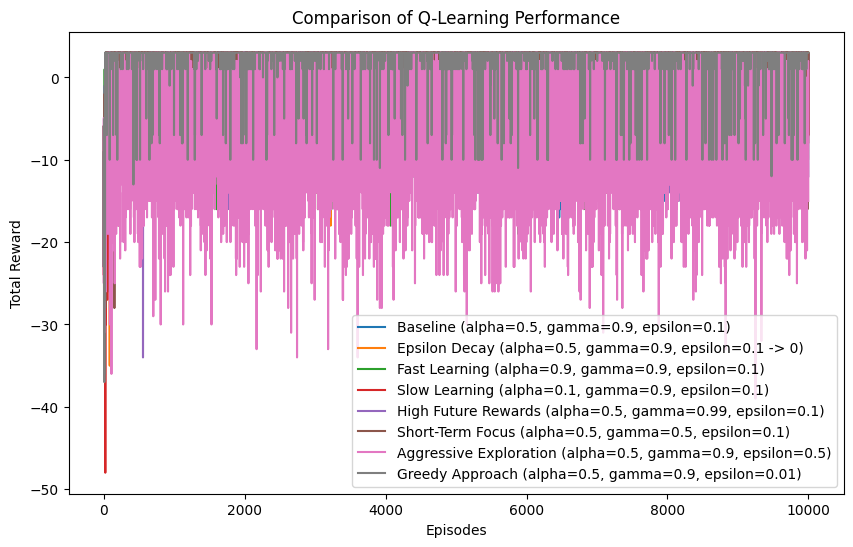

In [14]:
plt.figure(figsize=(10,6))

for name, rewards in results.items():
    plt.plot(rewards, label=name)

plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Comparison of Q-Learning Performance")
plt.legend()
plt.show()

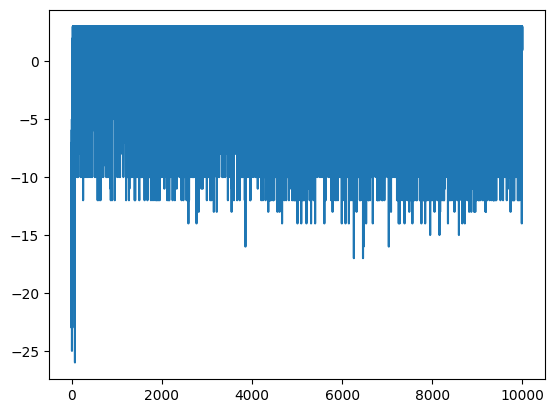

In [ ]:
# plt.plot(results["Baseline (alpha=0.5, gamma=0.9, epsilon=0.1)"], label=name)

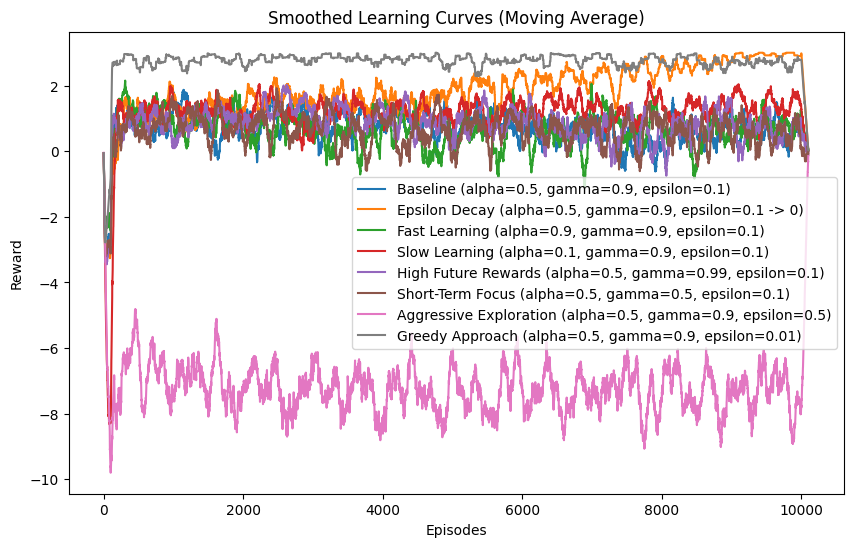

In [15]:
def moving_average(data, window_size=100):
    return np.convolve(data, np.ones(window_size)/window_size)

plt.figure(figsize=(10,6))

for name, rewards in results.items():
    smoothed_rewards = moving_average(rewards, window_size=100)  # Smooth if window size 200
    plt.plot(smoothed_rewards, label=name)

plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Smoothed Learning Curves (Moving Average)")
plt.legend()
plt.show()

In [36]:
# print(np.max(results["Greedy Approach (alpha=0.5, gamma=0.9, epsilon=0.01)"]))

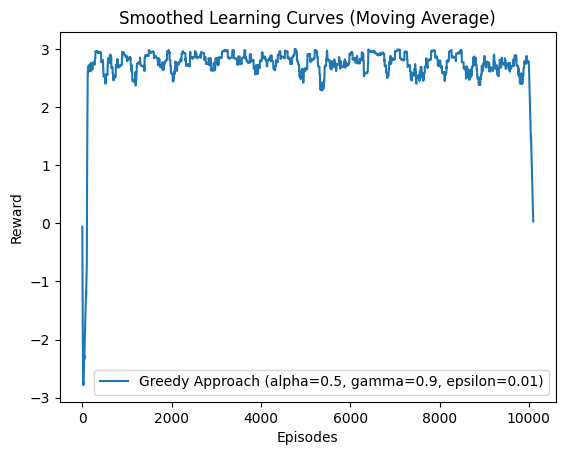

In [29]:
smoothed_rewards = moving_average(results["Greedy Approach (alpha=0.5, gamma=0.9, epsilon=0.01)"], window_size=100)  # Smooth if window size 200
plt.plot(smoothed_rewards, label="Greedy Approach (alpha=0.5, gamma=0.9, epsilon=0.01)")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Smoothed Learning Curves (Moving Average)")
plt.legend()
plt.show()

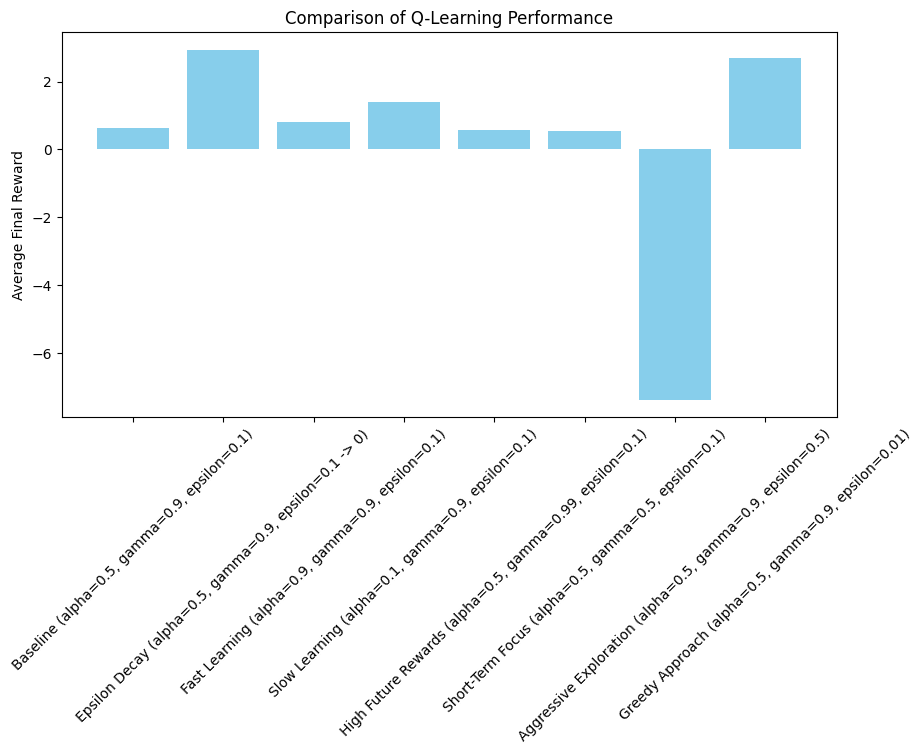

In [28]:
final_rewards = {name: np.mean(rewards[-1000:]) for name, rewards in results.items()}

plt.figure(figsize=(10,5))
plt.bar(final_rewards.keys(), final_rewards.values(), color='skyblue')
plt.xticks(rotation=45,)
plt.ylabel("Average Final Reward")
plt.title("Comparison of Q-Learning Performance")
plt.show()
